<a href="https://colab.research.google.com/github/JaimeNakamura/ml_learning/blob/main/MachineLearning_Lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lê a base e verificações iniciais

In [ ]:
link = "https://raw.githubusercontent.com/JaimeNakamura/dataset/main/dataset_MedicalCostPersonal/insurance.csv"


import pandas as pd

dados = pd.read_csv(link)
dados.head(10)

In [ ]:
dados.describe()

In [ ]:
dados.isnull().value_counts().unstack()

In [ ]:
dados.shape

# EDA Básica

In [ ]:
#Biblioteca de visualização
!pip install sweetviz

     |████████████████████████████████| 15.1MB 294kB/s 
     |████████████████████████████████| 71kB 5.9MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
import sweetviz
eda= sweetviz.analyze([dados, "Seguro Saúde"],target_feat = "charges")
eda.show_html()

ModuleNotFoundError: ignored

# Algum pré-processamento interessante antes de prosseguir:
Transformar a variável smoker em 0 (não) ou 1 (sim)
Colocar a variável resposta na escala para cada mil dolares

In [ ]:

dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000

Variáveis que vamos considerar na análise, nesse primeiro momento: charges, bmi, smoker.

In [ ]:
dados = dados[['bmi', 'smoker', 'charges']]
dados.head(199)

----

Gráficos pertinentes

In [ ]:
import seaborn as sns

sns.scatterplot(x = 'bmi', y = 'charges', data = dados);

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

---
#Cenário 1: considerando apenas a variável bmi.

In [ ]:
X = dados['bmi'].values.reshape(-1, 1)
y = dados['charges']


Preparação para a validação do tipo Holdout

In [ ]:
# Holdout
# Separando em dados teste e treinamento 

from sklearn.model_selection import train_test_split 

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
#25% vai para o teste, enquanto 75% vai para o treino
#Conjunto de dados de 1MM, 50.000 testes é suficiente, ou seja 5%.

In [ ]:
print(Xtreino.shape)
print(Xteste.shape)

(1003, 1)
(335, 1)


In [ ]:
# Ajuste do modelo de regressão linear
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(Xtreino, ytreino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predição utilizando a amostra teste
preditos = reg.predict(Xteste)
preditos

array([ 9.81320598, 12.13603698, 11.6933996 , 14.66394309,  9.80305374,
       11.53908565, 13.69948092, 13.07004245, 13.47613178, 11.30761473,
       15.39693434, 12.61928328, 13.80100325, 12.73501875, 13.31369605,
       12.69644026,  9.07006249, 13.46801   , 13.19186925, 12.5807048 ,
       14.81622659, 15.75023206, 14.70252158, 17.67509551, 17.89844465,
       11.4456851 , 15.58982677, 13.77663789, 15.53094382, 15.97561164,
       11.50050717, 13.08222513, 13.62232394, 14.85683552, 10.840612  ,
       11.30761473, 12.15634144, 13.85379486, 17.09032687, 15.6649533 ,
       12.88933269, 11.61624263, 15.10048912, 16.42434036, 12.98476369,
       17.41519834,  9.41523843, 12.13603698,  9.90254563, 14.58678611,
       13.39085302, 19.19386963, 17.98169296, 10.76751591, 12.19491993,
       12.70456204, 13.1593821 , 12.89542403, 14.00810881, 18.56849205,
       13.92283005, 13.89237335, 11.46192868, 10.65178045, 11.84771355,
        9.6487398 , 12.34923388, 15.79896278, 16.0344946 , 14.68

In [ ]:
#Erro entre o preditos e a base de testes
import numpy as np
np.mean((preditos - yteste)**2)

123.02463885167852

In [ ]:
# Erro Quadrático Médio
from sklearn.metrics import mean_squared_error 
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 123.02


In [ ]:
# Coeficientes
b0 = reg.intercept_
b1 = reg.coef_
print('Intercepto: \n', b0)
print('Coeficientes: \n', b1)

Intercepto: 
 0.9685802493741953
Coeficientes: 
 [0.40608934]



Nesse cenário, o modelo de regressão linear é dado por

**CUSTOS = b0 + b1 * IMC**

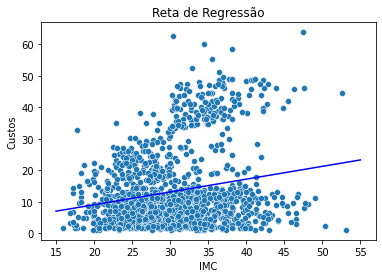

In [ ]:
import numpy as np

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x

import matplotlib.pyplot as plt

sns.scatterplot(x = 'bmi', y = 'charges', data = dados);
plt.plot(x, y0, color = 'blue')
plt.title('Reta de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

Note agora o que aconteceria se ajustassemos e avaliassemos o modelo no mesmo conjunto de dados (nesse caso, os dados todos).

In [ ]:
reg0 = LinearRegression()
reg0.fit(X, y)
preditos = reg0.predict(X)

eqm = mean_squared_error(y, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 140.78


#Cenário 2: considerando a variável bmi e smoker.

In [ ]:
X = dados[['bmi', 'smoker']]
y = dados['charges']

In [ ]:
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
#Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = propTest,random_state = 12) - Reutiliza os mesmos dados para treino e teste
reg = LinearRegression()
reg.fit(Xtreino, ytreino)

preditos = reg.predict(Xteste)

eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 46.77


In [ ]:
# Coeficientes
b0 = reg.intercept_
b1, b2 = reg.coef_
print('Intercepto: \n',reg.intercept_)
print('Coeficientes: \n', reg.coef_)

Intercepto: 
 -4.203142234008142
Coeficientes: 
 [ 0.41229526 23.36918627]


In [ ]:
import numpy as np

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x + b2*0
y1 = b0 + b1*x + b2*1

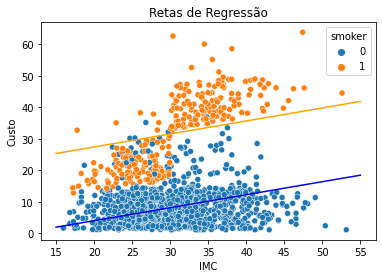

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)
plt.plot(x, y0, color = 'blue')
plt.plot(x, y1, color = 'orange')
plt.title('Retas de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()


#Exercício
Faça repetições da técnica Holdout, variando a distribuição de quem vai para amostra de teste e treinamento. Guarde os resultados do EQM para cada repetição e, no final, calcule sua média para obter um valor mais estável para o EQM.

In [ ]:
import pandas as pd

lista = []
repTest = 100
propTest = 0.25

for i in range(repTest):
  Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = propTest)
  

  reg = LinearRegression()
  reg.fit(Xtreino, ytreino)

  preditos = reg.predict(Xteste)

  eqm = mean_squared_error(yteste, preditos)

  lista.append(eqm)

#Transformado em um tipo dataframe para executar o comando mean
dfMedia = pd.DataFrame({"media": lista})
"""print(lista)
print(dfMedia)
print(dfMedia.mean())"""

print ("A média do EQM foi de {}, considerando a proporção de {} para testes e {} repetições".format(round(dfMedia['media'].mean(),2), propTest, repTest))


A média do EQM foi de 50.75, considerando a proporção de 0.25 para testes e 100 repetições


In [ ]:
#Resolução
R = 100
eqms = []

for i in range(R):
  Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = propTest)
  reg = LinearRegression()
  reg.fit(Xtreino, ytreino)
  preditos = reg.predict(Xteste)
  eqm = mean_squared_error(yteste, preditos)
  eqms.append(eqm)

np.mean(eqms)

50.91286016316329

---

In [ ]:
---